In [1]:
using NamedArrays, DelimitedFiles, DataFrames
using AlgebraOfGraphics, CairoMakie
using SimSpread

In [2]:
# Load dataset
y = NamedArray(readdlm("../yamanishi2008/DT/nr_DT.txt"))
setnames!(y,["D$i" for i in 1:size(y,1)],1)
setnames!(y,["T$i" for i in 1:size(y,2)],2)

X = NamedArray(readdlm("../yamanishi2008/DD/nr_DD.maccs.txt"))
setnames!(X,["D$i" for i in 1:size(X,1)],1)
setnames!(X,["D$i" for i in 1:size(X,2)],2)

y,X

([0.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 1.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [1.0 0.7567567567567568 … 0.45 0.38461538461538464; 0.7567567567567568 1.0 … 0.4 0.3076923076923077; … ; 0.45 0.4 … 1.0 0.35185185185185186; 0.38461538461538464 0.3076923076923077 … 0.35185185185185186 1.0])

In [3]:
# Load dataset
y = read_namedmatrix("../simspread-antifungals/data/DT/antifungals.DT.csv", '\t')
#setnames!(y,["D$i" for i in 1:size(y,1)],1)
#setnames!(y,["T$i" for i in 1:size(y,2)],2)

X = read_namedmatrix("../simspread-antifungals/data/DD/antifungals.ecfp4_tanimoto.txt", ' ')
#setnames!(X,["D$i" for i in 1:size(X,1)],1)
#setnames!(X,["D$i" for i in 1:size(X,2)],2)

y,X

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [1.0 0.6111111111111112 … 0.056818181818181816 0.05555555555555555; 0.6111111111111112 1.0 … 0.07407407407407407 0.07692307692307693; … ; 0.056818181818181816 0.07407407407407407 … 1.0 0.07142857142857142; 0.05555555555555555 0.07692307692307693 … 0.07142857142857142 1.0])

In [4]:
# Split dataset
test, train... = split(y, 10)
train = vcat(train...)

ytest = y[test,:]
Xtest = X[test,train]
ytrain = y[train,:]
Xtrain = X[train,train];

In [5]:
ytest, ytrain

([0.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [6]:
Xtrain, Xtest

([1.0 0.08088235294117647 … 0.09045226130653267 0.06756756756756757; 0.08088235294117647 1.0 … 0.06569343065693431 0.06097560975609756; … ; 0.09045226130653267 0.06569343065693431 … 1.0 0.04666666666666667; 0.06756756756756757 0.06097560975609756 … 0.04666666666666667 1.0], [0.0859375 0.13333333333333333 … 0.06153846153846154 0.06756756756756757; 0.029197080291970802 0.1111111111111111 … 0.04477611940298507 0.02531645569620253; … ; 0.08791208791208792 0.049586776859504134 … 0.13872832369942195 0.078125; 0.14189189189189189 0.15294117647058825 … 0.08387096774193549 0.06862745098039216])

In [7]:
# Featurize description
Xtrain′= featurize(Xtrain, 0.0, false)
Xtest′ = featurize(Xtest, 0.0, false)

9×86 Named Matrix{Float64}
                                                                                               A ╲ B │   …  
─────────────────────────────────────────────────────────────────────────────────────────────────────┼──────
Imipramine                                                                                           │   …  
Robenidine                                                                                           │      
Bleomycin                                                                                            │      
Bepridil                                                                                             │      
Aripiprazole                                                                                         │      
Auranofin                                                                                            │      
Zotepine                                                                                             

In [8]:
# Construct trilayered graph
G = construct(ytrain, ytest, Xtrain′, Xtest′)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [9]:
# Predict interactions
yhat = predict(G, ytest; GPU = false)

9×14 Named Matrix{Float64}
                                                                                               A ╲ B │   …  
─────────────────────────────────────────────────────────────────────────────────────────────────────┼──────
Imipramine                                                                                           │   …  
Robenidine                                                                                           │      
Bleomycin                                                                                            │      
Bepridil                                                                                             │      
Aripiprazole                                                                                         │      
Auranofin                                                                                            │      
Zotepine                                                                                             

In [10]:
trg_degree = k(y')
setnames!(trg_degree, names(y,2), 1)
trg_degree

14×1 Named Matrix{Int64}
                      A ╲ B │  1
────────────────────────────┼───
Aspergillus flavus          │  3
Aspergillus fumigatus       │  8
Aspergillus niger           │  3
Candida albicans            │ 78
Candida glabrata            │ 17
Candida parapsilosis        │ 16
Candida tropicalis          │ 13
Cryptococcus deuterogattii  │  4
Cryptococcus gattii         │  5
Cryptococcus neoformans     │ 22
Fusarium spp                │  7
Penicillium digitatum       │  1
Trichophyton�spp            │  5
Zygomycetes                 │  1

In [11]:
ligands = names(y,1)
targets = names(y,2)

14-element Vector{String}:
 "Aspergillus flavus"
 "Aspergillus fumigatus"
 "Aspergillus niger"
 "Candida albicans"
 "Candida glabrata"
 "Candida parapsilosis"
 "Candida tropicalis"
 "Cryptococcus deuterogattii "
 "Cryptococcus gattii"
 "Cryptococcus neoformans "
 "Fusarium spp "
 "Penicillium digitatum"
 "Trichophyton�spp"
 "Zygomycetes"

In [12]:
# Evaluate predictions
predictions = Dict()
predictions[" Alpha"] = []
predictions[" Fold"] = []
predictions[" Ligand"] = []
predictions[" Target"] = []
predictions[" y"] = []
predictions[" yhat"] = []

perf = Dict()
perf[" Alpha"] = []
perf[" Fold"] = []
perf[" Ligand"] = []
perf[" AuROC"] = []
perf[" AuPRC"] = []

splits = split(y, 10)
for α in 0.0:0.05:1.0
for (fidx, test) in enumerate(splits)
    # Prepare dataset
    train = setdiff(ligands, test)

    ytest = y[test,:]
    Xtest = X[test,train]
    ytrain = y[train,:]
    Xtrain = X[train,train]
    
    # Featurize description
    Xtrain′= featurize(Xtrain, α, false)
    Xtest′ = featurize(Xtest, α, false)
    
    # Construct trilayered graph
    G = construct(ytrain, ytest, Xtrain′, Xtest′)
    
    # Predict interactions
    yhat = predict(G, ytest; GPU = false)
    
    
    for (i, yhatᵢ) in enumerate(eachrow(yhat))
        for (trg, score) in zip(targets, yhatᵢ)
            push!(predictions[" Alpha"], α)
            push!(predictions[" Fold"], fidx)
            push!(predictions[" Ligand"], ligands[i])
            push!(predictions[" Target"], trg)
            push!(predictions[" yhat"], score)
            push!(predictions[" y"], y[ligands[i], trg])
        end
        
        push!(perf[" Alpha"], α)
        push!(perf[" Fold"], fidx)
        push!(perf[" Ligand"], ligands[i])
        push!(perf[" AuROC"], AuROC(Bool.(y[ligands[i], :]), yhatᵢ))
        push!(perf[" AuPRC"], AuPRC(Bool.(y[ligands[i], :]), yhatᵢ))
    end
end
end

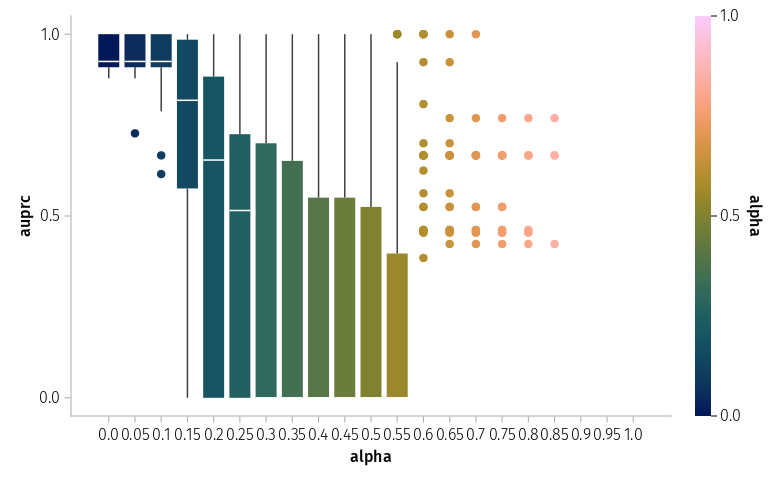

In [13]:
set_aog_theme!()

axis = (width = 600, height = 400)
df = (
    auprc = vec(perf[" AuROC"]),
    alpha = vec(perf[" Alpha"]),
)
plt = data(df) * mapping(:alpha=> nonnumeric, :auprc, color=:alpha) * visual(BoxPlot)

draw(plt; axis)

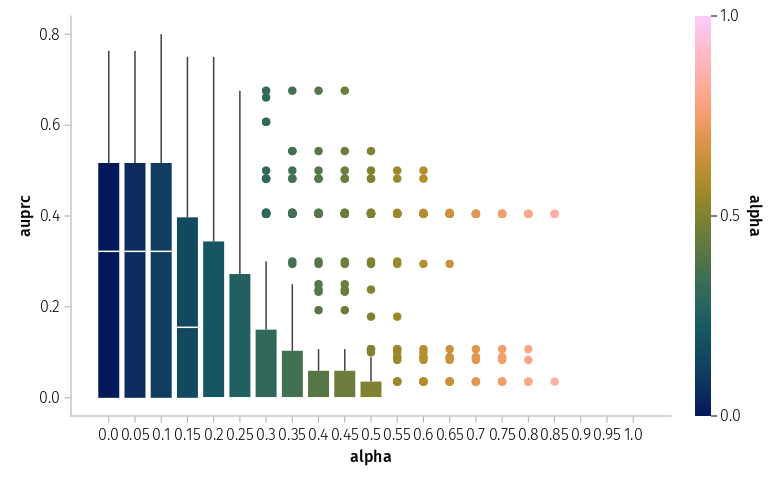

In [14]:
set_aog_theme!()

axis = (width = 600, height = 400)
df = (
    auprc = vec(perf[" AuPRC"]),
    alpha = vec(perf[" Alpha"]),
)
plt = data(df) * mapping(:alpha=> nonnumeric, :auprc, color=:alpha) * visual(BoxPlot)

draw(plt; axis)

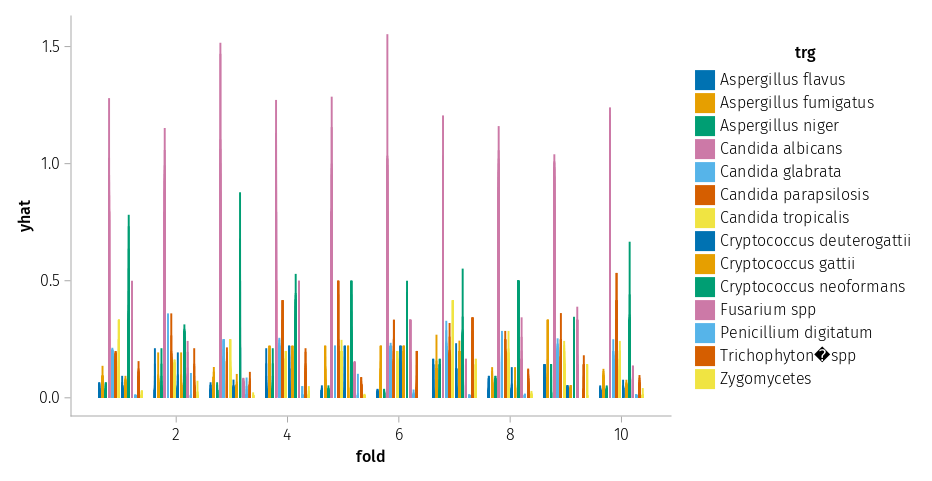

In [15]:
axis = (width = 600, height = 400)
df = (
    lig = vec(predictions[" Ligand"]),
    trg = vec(predictions[" Target"]), 
    yhat = vec(predictions[" yhat"]),
    fold = vec(predictions[" Fold"]),
)
plt = data(df) * mapping(:fold, :yhat, color=:trg, dodge=:trg) * visual(BarPlot)

draw(plt; axis)

# Remove problematic target

In [16]:
println("Original shape of DT matrix: $(size(y))")

Original shape of DT matrix: (95, 14)


In [17]:
y′ = y[:, [t for t in names(y,2) if t != "Candida albicans"]]
nonempty = first.(Tuple.(findall(!iszero, k(y′))))
y′ = y′[nonempty, :]
X′ = X[nonempty, nonempty]
ligands′ = ligands[nonempty]
targets′ = [t for t in names(y,2) if t != "Candida albicans"]
println("Shape of DT matrix without Candida albicans: $(size(y′))")

Shape of DT matrix without Candida albicans: (43, 13)


In [18]:
# Evaluate predictions
predictions = Dict()
predictions[" Alpha"] = []
predictions[" Fold"] = []
predictions[" Ligand"] = []
predictions[" Target"] = []
predictions[" y"] = []
predictions[" yhat"] = []
perf[" Alpha"] = []
perf[" Fold"] = []
perf[" AuROC"] = []
perf[" AuPRC"] = []

splits = split(y′, 10)
for α in 0.0:0.05:1.0
for (fidx, test) in enumerate(splits)
    # Prepare dataset
    train = setdiff(ligands′, test)

    ytest = y′[test,:]
    Xtest = X′[test, train]
    ytrain = y′[train,:]
    Xtrain = X′[train, train]
    
    # Featurize description
    Xtrain′= featurize(Xtrain, α, false)
    Xtest′ = featurize(Xtest, α, false)
    
    # Construct trilayered graph
    G = construct(ytrain, ytest, Xtrain′, Xtest′)
    
    # Predict interactions
    yhat = predict(G, ytest; GPU = false)
    
    
    for (i, yhatᵢ) in enumerate(eachrow(yhat))
        for (trg, score) in zip(targets′, yhatᵢ)
            push!(predictions[" Alpha"], α)
            push!(predictions[" Fold"], fidx)
            push!(predictions[" Ligand"], ligands′[i])
            push!(predictions[" Target"], trg)
            push!(predictions[" yhat"], score)
            push!(predictions[" y"], y′[ligands′[i], trg])
        end
        
        push!(perf[" Alpha"], α)
        push!(perf[" Fold"], fidx)
        push!(perf[" AuROC"], AuROC(Bool.(y′[ligands′[i], :]), yhatᵢ))
        push!(perf[" AuPRC"], AuPRC(Bool.(y′[ligands′[i], :]), yhatᵢ))
    end
end
end

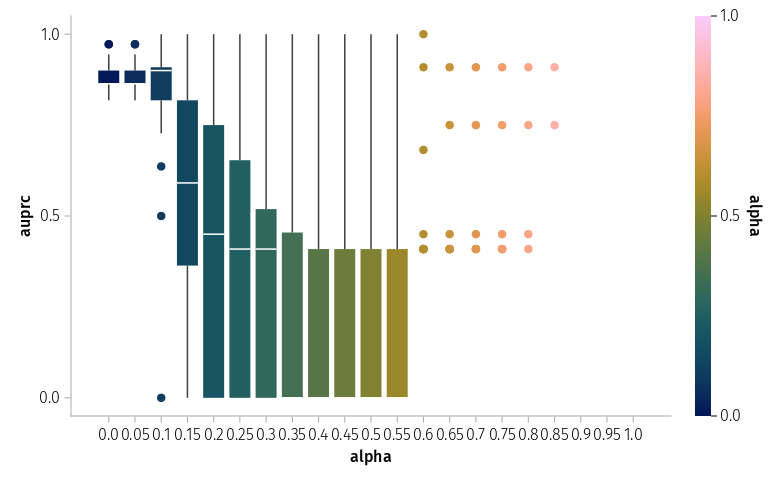

In [19]:
set_aog_theme!()

axis = (width = 600, height = 400)
df = (
    auprc = vec(perf[" AuROC"]),
    alpha = vec(perf[" Alpha"]),
)
plt = data(df) * mapping(:alpha=> nonnumeric, :auprc, color=:alpha) * visual(BoxPlot)

draw(plt; axis)

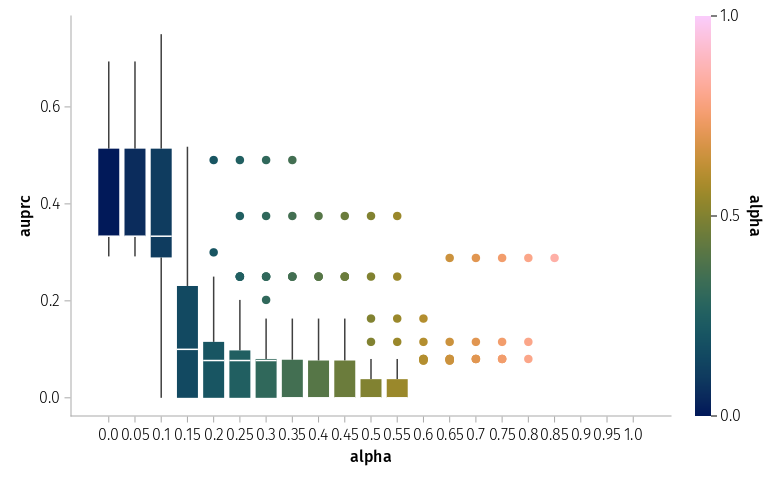

In [20]:
set_aog_theme!()

axis = (width = 600, height = 400)
df = (
    auprc = vec(perf[" AuPRC"]),
    alpha = vec(perf[" Alpha"]),
)
plt = data(df) * mapping(:alpha=> nonnumeric, :auprc, color=:alpha) * visual(BoxPlot)

draw(plt; axis)

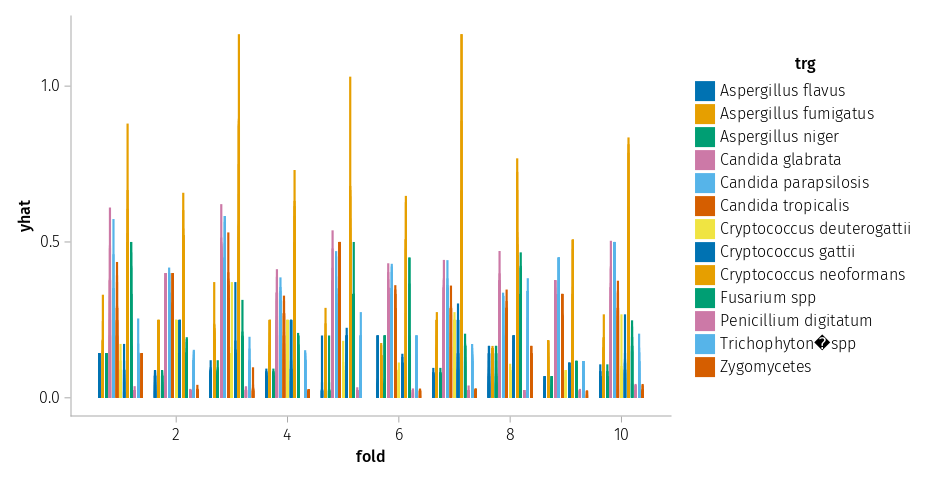

In [21]:
axis = (width = 600, height = 400)
df = (
    lig = vec(predictions[" Ligand"]),
    trg = vec(predictions[" Target"]), 
    yhat = vec(predictions[" yhat"]),
    fold = vec(predictions[" Fold"]),
)
plt = data(df) * mapping(:fold, :yhat, color=:trg, dodge=:trg) * visual(BarPlot)

draw(plt; axis)

# Normalize score by degree

In [22]:
# Evaluate predictions
predictions = Dict()
predictions[" Alpha"] = []
predictions[" Fold"] = []
predictions[" Ligand"] = []
predictions[" Target"] = []
predictions[" y"] = []
predictions[" yhat"] = []

perf = Dict()
perf[" Alpha"] = []
perf[" Fold"] = []
perf[" Ligand"] = []
perf[" AuROC"] = []
perf[" AuPRC"] = []

k_trgs = Dict(zip(names(y,2), k(y').array))

splits = split(y, 10)
for α in 0.0:0.05:1.0
for (fidx, test) in enumerate(splits)
    # Prepare dataset
    train = setdiff(ligands, test)

    ytest = y[test,:]
    Xtest = X[test,train]
    ytrain = y[train,:]
    Xtrain = X[train,train]
    
    # Featurize description
    Xtrain′= featurize(Xtrain, α, false)
    Xtest′ = featurize(Xtest, α, false)
    
    # Construct trilayered graph
    G = construct(ytrain, ytest, Xtrain′, Xtest′)
    
    # Predict interactions
    yhat = predict(G, ytest; GPU = false)
    
    k_trgs = Dict(zip(names(y,2), k(ytest').array))
    
    for (i, yhatᵢ) in enumerate(eachrow(yhat))
        for (trg, score) in zip(targets, yhatᵢ)
            push!(predictions[" Alpha"], α)
            push!(predictions[" Fold"], fidx)
            push!(predictions[" Ligand"], ligands[i])
            push!(predictions[" Target"], trg)
            push!(predictions[" yhat"], score / (1 + k_trgs[trg]))
            push!(predictions[" y"], y[ligands[i], trg])
        end
        
        push!(perf[" Alpha"], α)
        push!(perf[" Fold"], fidx)
        push!(perf[" Ligand"], ligands[i])
        push!(perf[" AuROC"], AuROC(Bool.(y[ligands[i], :]), yhatᵢ ./ (1 .+ values(k_trgs))))
        push!(perf[" AuPRC"], AuPRC(Bool.(y[ligands[i], :]), yhatᵢ ./ (1 .+ values(k_trgs))))
    end
end
end

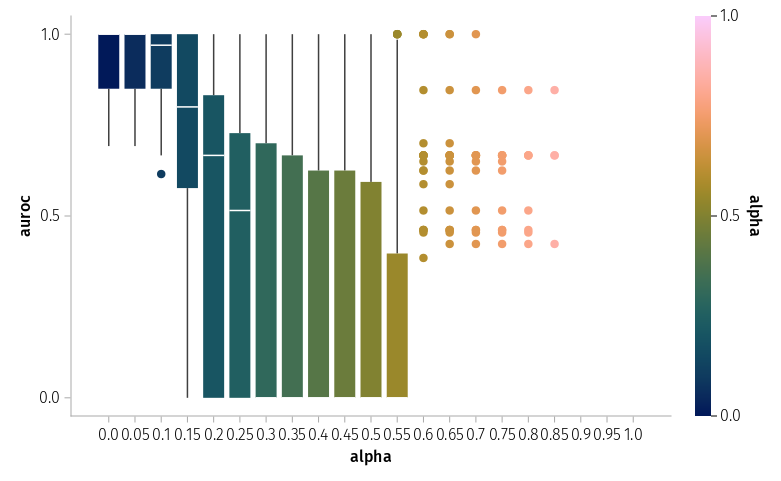

In [23]:
set_aog_theme!()

axis = (width = 600, height = 400)
df = (
    auroc = vec(perf[" AuROC"]),
    alpha = vec(perf[" Alpha"]),
)
plt = data(df) * mapping(:alpha=> nonnumeric, :auroc, color=:alpha) * visual(BoxPlot)

draw(plt; axis)

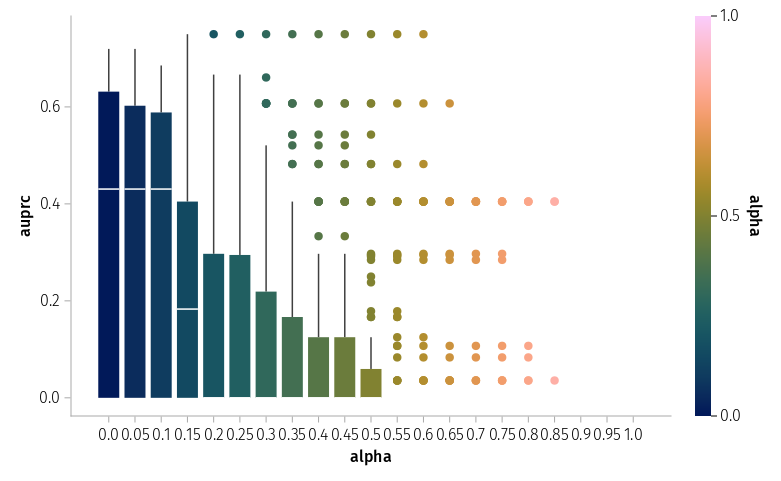

In [24]:
set_aog_theme!()

axis = (width = 600, height = 400)
df = (
    auprc = vec(perf[" AuPRC"]),
    alpha = vec(perf[" Alpha"]),
)
plt = data(df) * mapping(:alpha=> nonnumeric, :auprc, color=:alpha) * visual(BoxPlot)

draw(plt; axis)

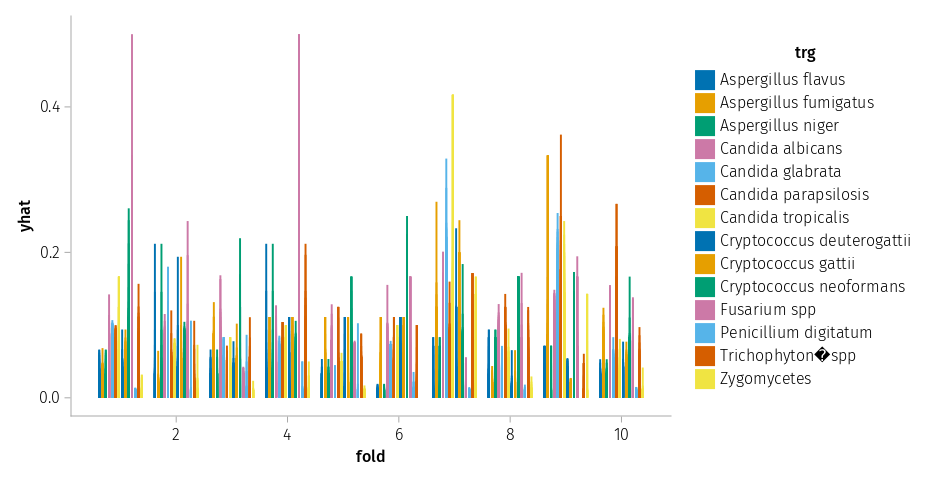

In [25]:
axis = (width = 600, height = 400)
df = (
    lig = vec(predictions[" Ligand"]),
    trg = vec(predictions[" Target"]), 
    yhat = vec(predictions[" yhat"]),
    fold = vec(predictions[" Fold"]),
)
plt = data(df) * mapping(:fold, :yhat, color=:trg, dodge=:trg) * visual(BarPlot)

draw(plt; axis)

In [26]:
# Evaluate predictions
predictions = Dict()
predictions[" Alpha"] = []
predictions[" Fold"] = []
predictions[" Ligand"] = []
predictions[" Target"] = []
predictions[" y"] = []
predictions[" yhat"] = []

perf = Dict()
perf[" Alpha"] = []
perf[" Ligand"] = []
perf[" Fold"] = []
perf[" AuROC"] = []
perf[" AuPRC"] = []

splits = split(y′, 10)
for α in 0.0:0.05:1.0
for (fidx, test) in enumerate(splits)
    # Prepare dataset
    train = setdiff(ligands′, test)

    ytest = y′[test,:]
    Xtest = X′[test, train]
    ytrain = y′[train,:]
    Xtrain = X′[train, train]
    
    # Featurize description
    Xtrain′= featurize(Xtrain, α, false)
    Xtest′ = featurize(Xtest, α, false)
    
    # Construct trilayered graph
    G = construct(ytrain, ytest, Xtrain′, Xtest′)
    
    # Predict interactions
    yhat = predict(G, ytest; GPU = false)
    k_trgs = Dict(zip(names(ytest,2), k(ytest').array))
    
    
    for (i, yhatᵢ) in enumerate(eachrow(yhat))
        for (trg, score) in zip(targets′, yhatᵢ)
            push!(predictions[" Alpha"], α)
            push!(predictions[" Fold"], fidx)
            push!(predictions[" Ligand"], ligands′[i])
            push!(predictions[" Target"], trg)
            push!(predictions[" yhat"], score / (1 + k_trgs[trg]))
            push!(predictions[" y"], y′[ligands′[i], trg])
        end
        
        push!(perf[" Alpha"], α)
        push!(perf[" Ligand"], ligands′[i])
        push!(perf[" Fold"], fidx)
        push!(perf[" AuROC"], AuROC(Bool.(y′[ligands′[i], :]), yhatᵢ ./ (1 .+ values(k_trgs))))
        push!(perf[" AuPRC"], AuPRC(Bool.(y′[ligands′[i], :]), yhatᵢ ./ (1 .+ values(k_trgs))))
    end
end
end

# Set without _C. albicans_

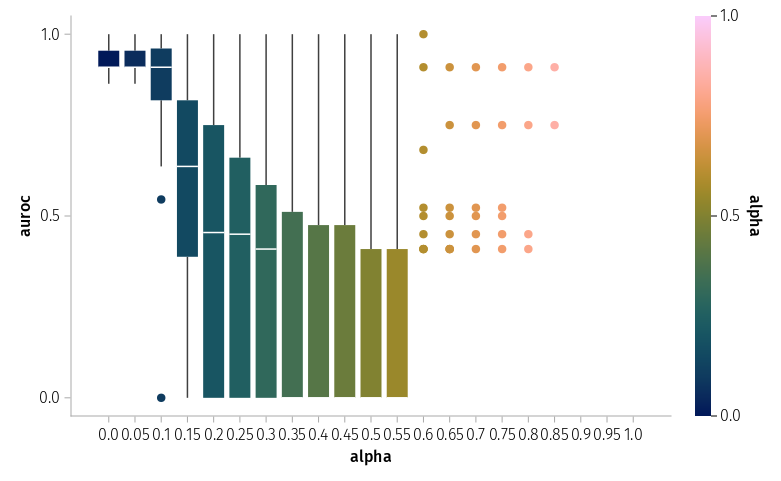

In [27]:
set_aog_theme!()

axis = (width = 600, height = 400)
df = (
    auroc = vec(perf[" AuROC"]),
    alpha = vec(perf[" Alpha"]),
)
plt = data(df) * mapping(:alpha=> nonnumeric, :auroc, color=:alpha) * visual(BoxPlot)

draw(plt; axis)

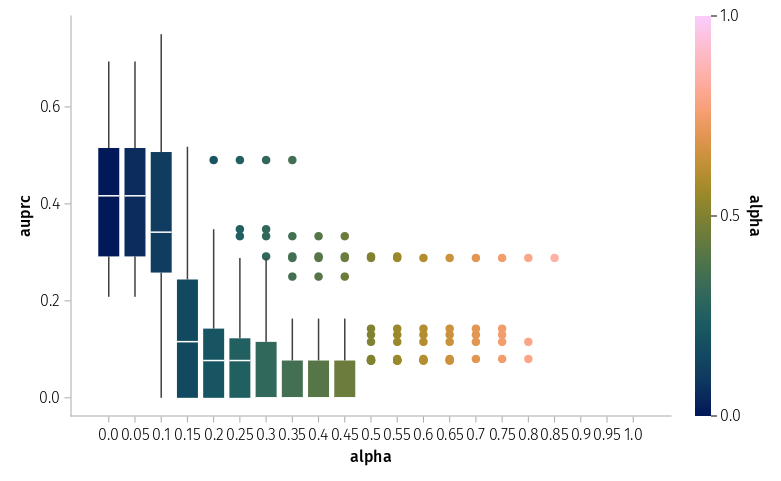

In [28]:
set_aog_theme!()

axis = (width = 600, height = 400)
df = (
    auprc = vec(perf[" AuPRC"]),
    alpha = vec(perf[" Alpha"]),
)
plt = data(df) * mapping(:alpha=> nonnumeric, :auprc, color=:alpha) * visual(BoxPlot)

draw(plt; axis)

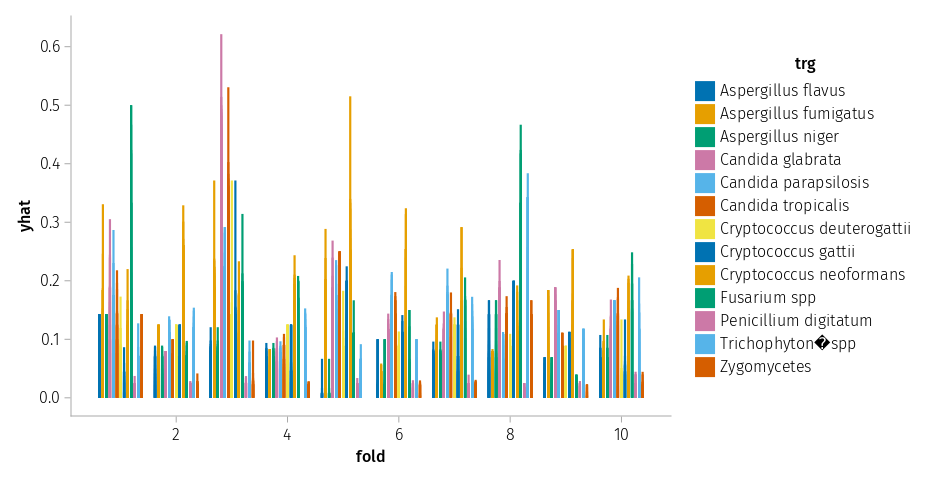

In [29]:
axis = (width = 600, height = 400)
df = (
    lig = vec(predictions[" Ligand"]),
    trg = vec(predictions[" Target"]), 
    yhat = vec(predictions[" yhat"]),
    fold = vec(predictions[" Fold"]),
)
plt = data(df) * mapping(:fold, :yhat, color=:trg, dodge=:trg) * visual(BarPlot)

draw(plt; axis)

In [30]:
df = DataFrame(predictions)

Row,Alpha,Fold,Ligand,Target,y,yhat
,Any,Any,Any,Any,Any,Any
1,0.0,1,(E)-3-(4-Tert-butylphenylsulfonyl)acrylonitrile_[bay_11-7085],Aspergillus flavus,0.0,0.0692389
2,0.0,1,(E)-3-(4-Tert-butylphenylsulfonyl)acrylonitrile_[bay_11-7085],Aspergillus fumigatus,0.0,0.184181
3,0.0,1,(E)-3-(4-Tert-butylphenylsulfonyl)acrylonitrile_[bay_11-7085],Aspergillus niger,0.0,0.0692389
4,0.0,1,(E)-3-(4-Tert-butylphenylsulfonyl)acrylonitrile_[bay_11-7085],Candida glabrata,1.0,0.18849
5,0.0,1,(E)-3-(4-Tert-butylphenylsulfonyl)acrylonitrile_[bay_11-7085],Candida parapsilosis,0.0,0.175728
6,0.0,1,(E)-3-(4-Tert-butylphenylsulfonyl)acrylonitrile_[bay_11-7085],Candida tropicalis,1.0,0.14435
7,0.0,1,(E)-3-(4-Tert-butylphenylsulfonyl)acrylonitrile_[bay_11-7085],Cryptococcus deuterogattii,0.0,0.0888889
8,0.0,1,(E)-3-(4-Tert-butylphenylsulfonyl)acrylonitrile_[bay_11-7085],Cryptococcus gattii,0.0,0.0444444
9,0.0,1,(E)-3-(4-Tert-butylphenylsulfonyl)acrylonitrile_[bay_11-7085],Cryptococcus neoformans,0.0,0.11449


In [31]:
using Chain
using Statistics

In [32]:
gdf = @chain df begin
    groupby([" Alpha", " Fold", " Target"])
    combine(
        " yhat" => mean => "yhat",
    )
end

Row,Alpha,Fold,Target,yhat
,Any,Any,Any,Float64
1,0.0,1,Aspergillus flavus,0.0692389
2,0.0,1,Aspergillus fumigatus,0.184181
3,0.0,1,Aspergillus niger,0.0692389
4,0.0,1,Candida glabrata,0.18849
5,0.0,1,Candida parapsilosis,0.175728
6,0.0,1,Candida tropicalis,0.14435
7,0.0,1,Cryptococcus deuterogattii,0.0888889
8,0.0,1,Cryptococcus gattii,0.0444444
9,0.0,1,Cryptococcus neoformans,0.11449


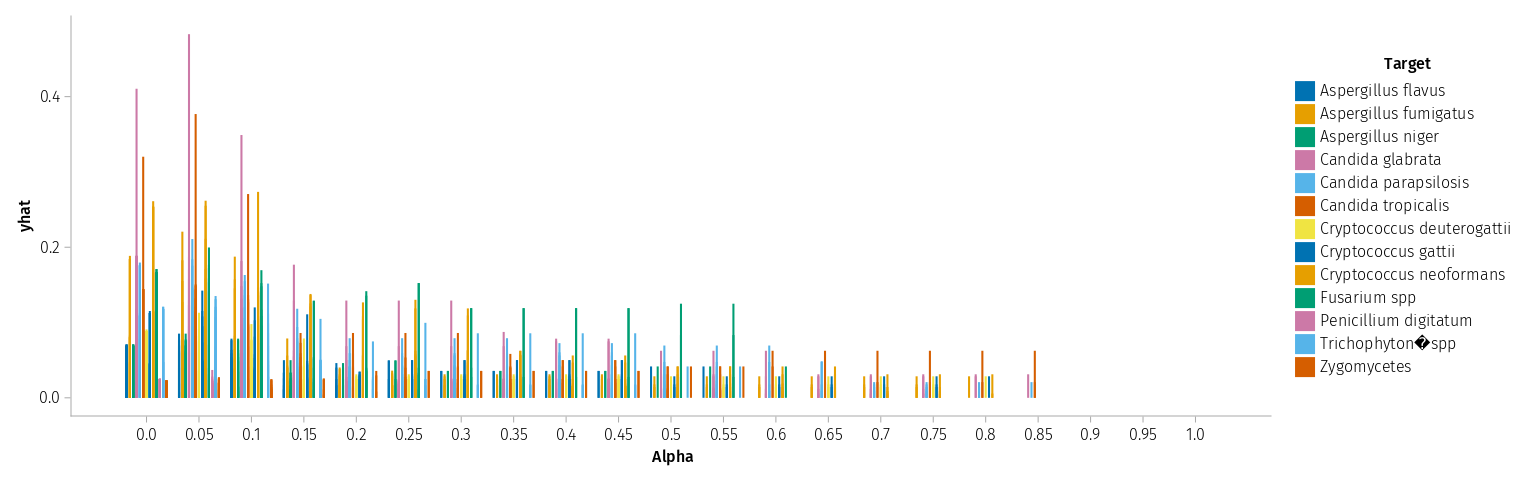

In [33]:
axis = (width = 1200, height = 400)
plt = data(gdf)
plt *= mapping(" Alpha" => nonnumeric, "yhat") 
plt *= mapping(color=" Target", dodge = " Target") 
plt *= visual(BarPlot)

draw(plt; axis)